In [2]:
#matplotlib 그래프를 셀 아래 바로 출력
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
digits.target[0], digits.images[0]

(0,
 array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]))

In [14]:
len(digits.data[0])

64

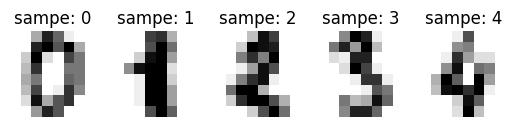

In [10]:
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sampe: %i' % label)

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

In [16]:
X = digits.data
Y = digits.target

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [20]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [19]:
losses = []
epochs = 100

In [21]:
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch%10==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.515532
Epoch   10/100 Cost: 2.166236
Epoch   20/100 Cost: 1.881223
Epoch   30/100 Cost: 1.546320
Epoch   40/100 Cost: 1.191358
Epoch   50/100 Cost: 0.879056
Epoch   60/100 Cost: 0.630653
Epoch   70/100 Cost: 0.458887
Epoch   80/100 Cost: 0.343587
Epoch   90/100 Cost: 0.264916


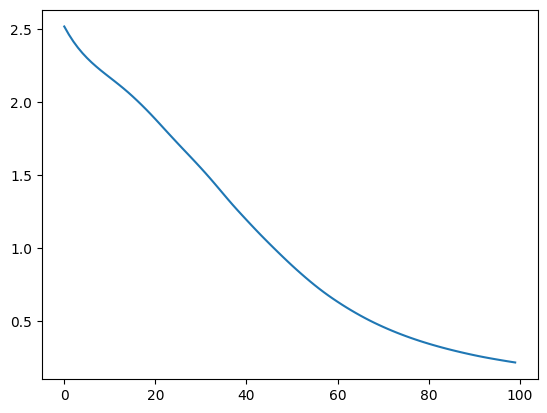

In [23]:
plt.plot(losses)